In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats import norm
from datetime import timedelta, datetime

# Open DataFrame

## Pulse Data

Open up all runs.

In [80]:
dfs = []
path = 'datafiles/june4'
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        df = pd.read_csv(path+'/'+filename, sep=',', index_col=0)
        df['ratio']=df['Integral 1200']/df['Integral 7400']
        df.index = pd.to_datetime(df.index,unit='s')-timedelta(hours=7)
        dfs.append(df)

Get beginning and end of each run.

In [81]:
begins = [df.index.values[0] for df in dfs]
ends = [df.index.values[-1] for df in dfs]

## Temperature Data

In [82]:
temps = pd.read_csv('datafiles/june4/june4temp.txt', skiprows=7, sep='\t')
temps['Time'] = pd.to_datetime(temps['DATE']+'-'+temps['TIME'])
temps.index = temps['Time']
temps = temps[['TEMPERATURE', 'RELATIVE-HUMIDITY', 'DEW-POINT']]

In [83]:
temps.head()

,TEMPERATURE,RELATIVE-HUMIDITY,DEW-POINT
Time,,,
2018-06-04 14:35:25,22.8,34.8,6.4
2018-06-04 14:45:25,22.1,35.9,6.3
2018-06-04 14:55:25,21.9,36.3,6.2
2018-06-04 15:05:25,21.8,35.9,6.0
2018-06-04 15:15:25,21.7,36.2,6.0


# Preliminary Plot

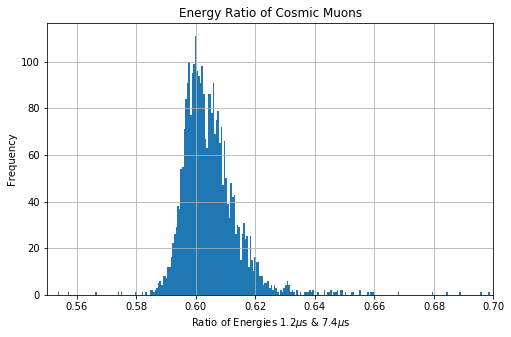

In [84]:
fig, ax = plt.subplots(figsize=(8,5))

dfs[0]['ratio'].hist(bins=1000, ax=ax)

ax.set_xlim(0.55,0.7)
ax.set_xlabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')
ax.set_ylabel('Frequency')
ax.set_title('Energy Ratio of Cosmic Muons')
plt.show()

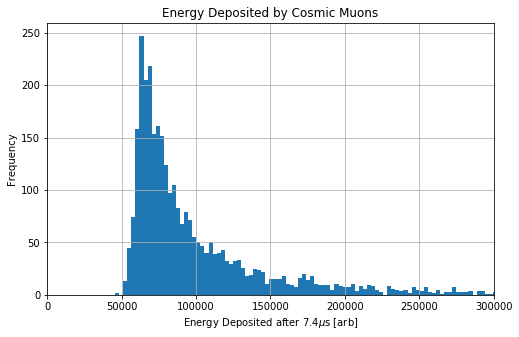

In [85]:
fig, ax = plt.subplots(figsize=(8,5))


dfs[0]['Integral 7400'].hist(bins=1000, ax=ax)
ax.set_xlim(0,300000)
ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Frequency')
ax.set_title('Energy Deposited by Cosmic Muons')

plt.show()

# Fitting Methods to Find the Mode

In [86]:
df = dfs[0]

Only fit values between 0.59 and 0.61 to normal curve:

In [87]:
mask = (df['ratio']>0.59) & (df['ratio']<0.61)
(mu, sigma) = norm.fit(df['ratio'][mask])

Get x and y values:

In [88]:
x = np.linspace(0.59, 0.61, 1000)

def gaussian(x, mu, sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Do plotting:

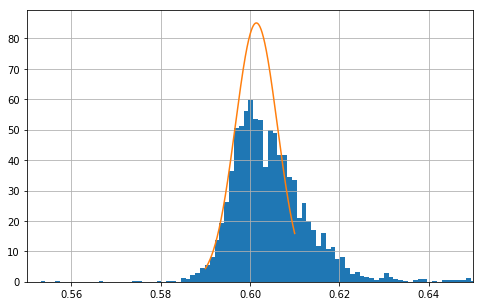

In [89]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=500, ax=ax, density=True)
ax.plot(x, gaussian(x, mu, sigma))

ax.set_xlim(0.55,0.65)
plt.show()

# 2D Histogram Stuff:

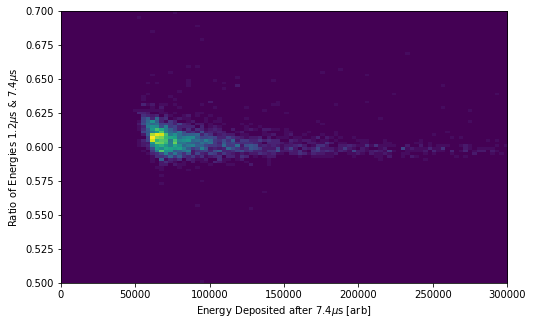

In [90]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist2d(df['Integral 7400'].values, df['ratio'].values,
          range=np.array([(0, 300000), (0.5, 0.7)]), bins=100)

ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')

plt.show()

# Plot Some Temperature Stuff

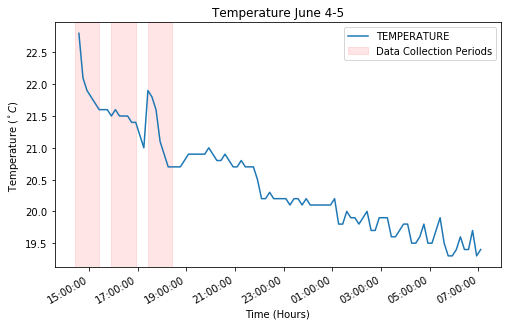

In [106]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(temps['TEMPERATURE'])
ax.axvspan(begin, end, alpha=0.1, color='red', label='Data Collection Periods') # get the label in there
[ax.axvspan(begin, end, alpha=0.1, color='red') for begin,end in zip(begins[1:], ends[1:])] #get the rest

xfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()

ax.set_title('Temperature June 4-5')
ax.set_ylabel('Temperature ($^\circ C$)')
ax.set_xlabel('Time (Hours)')
ax.legend()

plt.show()